<a href="https://colab.research.google.com/github/Iamfouzia/AI_Machine_Learning_projects/blob/main/Mental_disorder_using_gradient_boosting_random_forest_XGBoostst_%2ClightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mental disorder using gradient boosting random forest XGBoostst ,lightGBM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/Dataset-Mental-Disorders.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [ ]:
df.shape



(120, 19)

In [ ]:
# Show last rows
print(df.tail())

    Patient Number     Sadness   Euphoric  Exhausted Sleep dissorder  \
115    Patiant-116  Most-Often     Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes  Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually  Sometimes    Usually       Sometimes   
118    Patiant-119     Usually  Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes    Usually     Seldom         Usually   

    Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
115         NO               YES      NO                NO             YES   
116        YES                NO      NO                NO              NO   
117        YES                NO     YES               YES              NO   
118         NO               YES     YES                NO             YES   
119         NO                NO      NO               YES             YES   

    Aggressive Response Ignore & Move-On Nervous Break-down Admit Mistakes  \
115                 

In [ ]:
print(df.columns)
# Check for missing values


print(df.isnull().sum())

print("duplicate values")
print(df.duplicated().sum())
df = df.drop_duplicates()


Index(['Patient Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder',
       'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect',
       'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On',
       'Nervous Break-down', 'Admit Mistakes', 'Overthinking',
       'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose'],
      dtype='object')
Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64
duplicate values
0


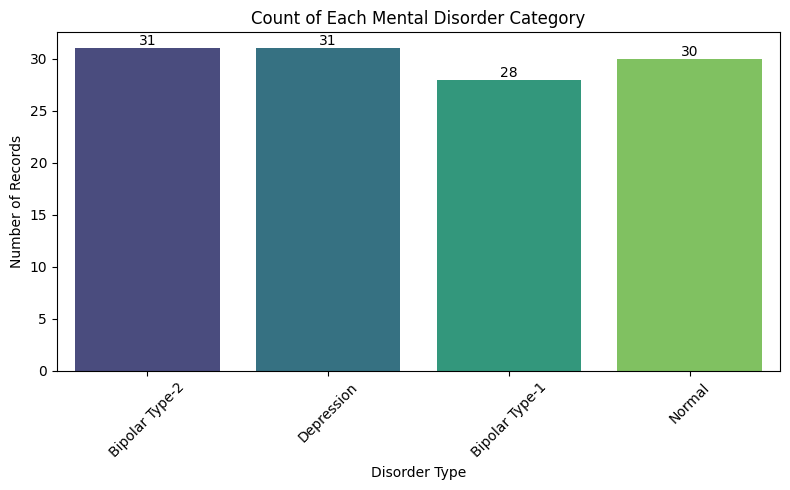

In [ ]:

# Check Class Distribution in Dataset
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['Expert Diagnose'], palette='viridis')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title('Count of Each Mental Disorder Category')
plt.xlabel('Disorder Type')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 Training Random Forest...


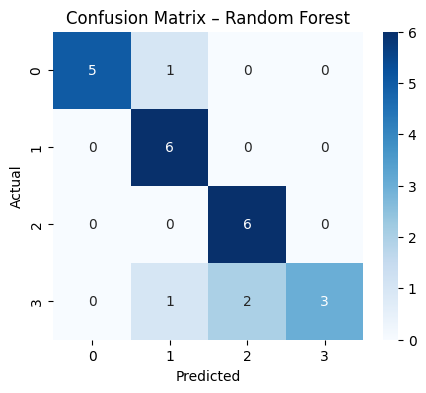


 Training XGBoost...


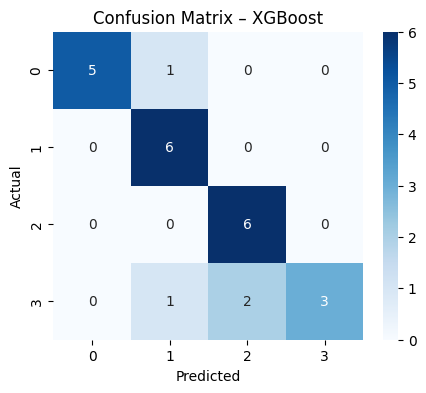


 Training LightGBM...


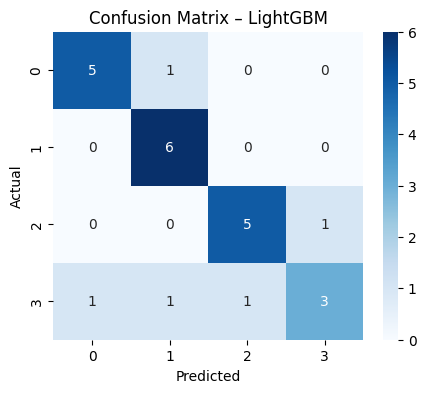


 Training Gradient Boosting...


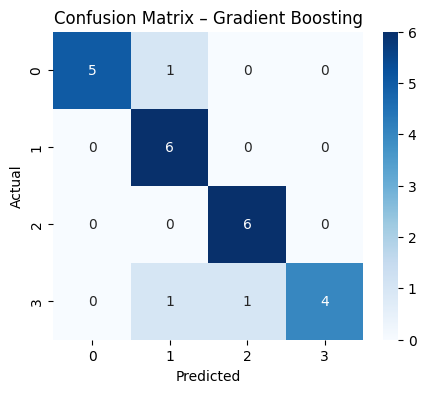


📊 Model Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
3,Gradient Boosting,0.875000,0.901786,0.875000,0.872328
0,Random Forest,0.833333,0.875000,0.833333,0.822511
1,XGBoost,0.833333,0.875000,0.833333,0.822511
2,LightGBM,0.791667,0.791667,0.791667,0.780952


In [ ]:

# MENTAL DISORDERS CLASSIFICATION

!pip install xgboost lightgbm --quiet

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix – {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/Dataset-Mental-Disorders.csv")

target_col = "Disorder" if "Disorder" in df.columns else df.columns[-1]
df = df.dropna().copy()
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric="logloss"),
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=200,
        max_depth=-1,
        num_leaves=31,
        min_data_in_leaf=1,
        learning_rate=0.05,
        verbosity=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []
for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    results.append([name, acc, prec, rec, f1])
    plot_confusion(y_test, y_pred, name)

results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1-Score"])
print("\n📊 Model Comparison:")
display(results_df.sort_values("Accuracy", ascending=False))
